# Project: Movie Data Investigation and Analysis

by Alissa McBain

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose to work with the TMDB dataset, exploring the different properties of movies, and how they interact with eachother. 

After poking around in the data, these are the three questions I have formulated:

1. Are big budget films becoming more common?

2. For production companies with at least 10 movies under their belt, are there any companies that stand out from the pack, that make either consistently better or worse movies?

3. What kinds of properties are associated with movies that have a high rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#load my data
df = pd.read_csv('tmdb-movies.csv')

#look at the first few rows to see if there is any cleaning I can do right off the bat
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#take a bit more of a peek into my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

First off, knowing my questions and what data will be needed to answer them, there are quite a few columns that are unnecessary that I am going to delete:

    imdb_id - don't need double ID columns, plus this column has a few missing values
    popularity - not sure how this score is calculated, and what it means
    budget and revenue - I'm going to use the adjusted budget and revenue columns
    cast - unnecessary
    homepage - unnecessary
    director - unnecessary
    tagline - unnecessary
    overview - unnecessary
    release_date - I'll use release_year for my analysis
    vote_count - unnecessary
    keywords - unnecessary

In [4]:
df.drop(['imdb_id','popularity','budget','revenue','cast','homepage','director','tagline','overview','release_date','vote_count','keywords'],
        axis = 1, inplace = True)

#to check and make sure it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id                      10866 non-null int64
original_title          10866 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 764.1+ KB


That looks good!

In [5]:
#To see my data from a different angle

df.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Something fishy is going on here with 'budget_adj' and 'revenue_adj'. Looks like over half of the values are 0, which seems highly unlikey, and makes this data suspect. I'm going to keep this in mind as I move forward with my analysis.

To tackle my second question,
    
    "For production companies with at least 10 movies under their belt, are there any
    companies that stand out from the pack, that make either consisntly better or worse 
    movies?"

I will have to break out the 'production_company' column. There are up to five pieces of data in each value, seperated by a '|'. I will need to seperate these, and save only the first, primary prodcution company name. 

All movies in the dataframe a 'vote_average' score, so no need to fill in missing data there. There are, though, several missing entries for 'production_company', but I will disregard them for now, and omit them when I do the analysis (using group_by will automatically omit them).

I don't see much else that needs to be cleaned, so I'll move onto data analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Are big budget films becoming more common?

To answer this question, I will look at the distrubition on 'adj_budget', specifically at the top 25% and the mean. Comparing those values with the 'release_year' I will attempt to determine if more of the top 25% fell within the last 20 years. 

In [6]:
#First I'm going to see the distribution of 'adj_budget'.

df.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Keeping in mind my observation from above, that over half of the data points in this column are 0, and therefore not correct, I will need to proceed with answering this question after dropping the rows for which there is no budget.


In [7]:
#I need to make a new df, and drop the rows where budget = 0

df_budget = df[['release_year', 'budget_adj']]
df_budget = df_budget[df_budget.budget_adj != 0]
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 2 columns):
release_year    5170 non-null int64
budget_adj      5170 non-null float64
dtypes: float64(1), int64(1)
memory usage: 121.2 KB


In [8]:
#Now I'l take a look at the details of my new data

df_budget.describe()

,release_year,budget_adj
count,5170.000000,5.170000e+03
mean,2001.252805,3.688774e+07
std,11.775932,4.195701e+07
min,1960.000000,9.210911e-01
25%,1996.000000,8.102293e+06
50%,2005.000000,2.272271e+07
75%,2010.000000,5.007483e+07
max,2015.000000,4.250000e+08


In [9]:
#This chart shows us that the top 25% in the 'budget_adj' column is >= 5.007483e+07,
#or $50,074,830. The maximum value for the budget is $425 million.

Next, I'd like to know how many movies were created (according to this dataset) in each year, 1960-2015, and also how many movies for each of those years were over the top 25% of the 'budget_adj' (>= $50,074,830). From those two data points I can calculate the percentage of movies that were "big budget" for each year, plot those, and compare to see if the proportion of "big budget" movies is rising, or falling, or doing nothing significant. 

To do this, I'm going to create a new column, called 'bb' (big budget), with the values in this column either 0 or 1. For this column a 'budget_adj' value of $50,074,830 or less would classify it as a 0, and anything greater than (or equal to) that number would classify it as a 1.

In [10]:
#Need to set my bin edges, [min,bb,max], and bin names

bin_edges = [-1, 50074830, 425000000]
#I tried using zero as the min, but was getting some 'NaN' values, so I'm using -1 instead

bin_names = [0,1]

#Add a new column to the df, using these bins

df_budget['bb'] = pd.cut(df_budget['budget_adj'], bin_edges, labels = bin_names)

In [11]:
#check to see if that worked, uncomment other cells to see from different angles
df_budget.head(5)
#df_budget.tail(5)
#df_budget.info()

,release_year,budget_adj,bb
0,2015,137999939.3,1
1,2015,137999939.3,1
2,2015,101199955.5,1
3,2015,183999919.0,1
4,2015,174799923.1,1


Now that I have that 0/1 big budget column sorted out, I'm going to create a new dataframe to summarize the data I will need to create the visualization I'd like to create.

The new dataframe 'df_year' will include the following columns:
    release_year - (unique key)
    bb - number of big budget films in that year
    movie_count - number of all films in that year
    bb_percent - the percent of big budget films (vs all films)
  
Using tha data, namely the 'bb_percent' data, I can plot it in a line graph and see what the percent of big budget films has been doing over time.

In [12]:
#create a new df called 'df_year' with two columns (initially), 'release_year' and 'bb'. 

df_year = df_budget.groupby('release_year', as_index=False)['bb'].sum()
df_year.head()

,release_year,bb
0,1960,1.0
1,1961,0.0
2,1962,3.0
3,1963,3.0
4,1964,1.0


In [13]:
#Create a new column in 'df_year' dataframe, 'movie_count' that counts up all the movies in a
#particlar year

df_year['movie_count'] = df_budget.groupby('release_year',as_index= False)['budget_adj'].count()['budget_adj']
df_year.head()

,release_year,bb,movie_count
0,1960,1.0,9
1,1961,0.0,13
2,1962,3.0,14
3,1963,3.0,11
4,1964,1.0,11


In [14]:
#I need to add in one last column, 'bb_percent', that calculates the percent of big budget films
#vs all films in each year

df_year['bb_percent'] = df_year['bb']/df_year['movie_count']
df_year.head()

,release_year,bb,movie_count,bb_percent
0,1960,1.0,9,0.111111
1,1961,0.0,13,0.000000
2,1962,3.0,14,0.214286
3,1963,3.0,11,0.272727
4,1964,1.0,11,0.090909


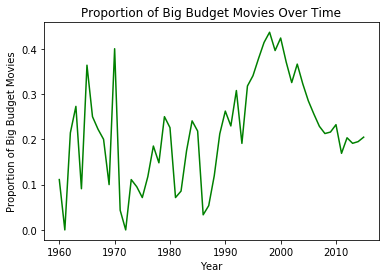

In [15]:
#Now I can plot the 'bb_percent' column to see the trend (if any)

plt.plot(df_year['release_year'], df_year['bb_percent'], color='g')

plt.xlabel('Year')
plt.ylabel('Proportion of Big Budget Movies')
plt.title('Proportion of Big Budget Movies Over Time');

This is interesting.

1960-1990 are pretty volitile, due to the few amount of movies in those years in this data set. That's fine; I'm really interested in the data from 2000 and onwards.

According to this graph, there is a peak of 'bb_percent' around 1998 (I'll determine this exactly in a moment), and has been pretty steadily declining since then. I wonder if that is because the total number of movies (the denominator) has been rapidly increasing, or if the amount of big budget movies has been decreasing?

In [16]:
#Where is the peak?

bb_max = df_year['bb_percent'].max()

max_query = df_year.loc[df_year['bb_percent'] == bb_max]
max_query

,release_year,bb,movie_count,bb_percent
38,1998,48.0,110,0.436364


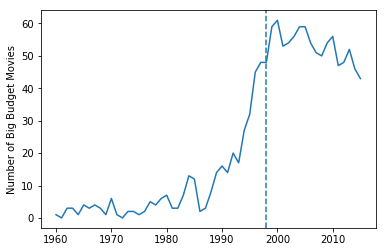

In [17]:
#Has the amount of big budget movies been declining since 1998?

plt.plot(df_year['release_year'], df_year['bb'])
plt.ylabel('Number of Big Budget Movies')
plt.axvline(x = 1998, ls = 'dashed');

Seems like the amount of big budget movies has had a rough ride, but overall, since the peak in 1998, it has indeed been falling.

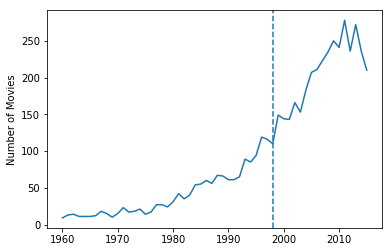

In [18]:
#How has the amount of total movies changed since 1998?

plt.plot(df_year['release_year'], df_year['movie_count'])
plt.ylabel('Number of Movies')
plt.axvline(x = 1998, ls = 'dashed');

The total output of movies (according to this database) has definitley increased since 1998.

So it seems like the main driver of the decrease in the proportion of big budget movies since 1998 is due mostly to the sheer amount of movies (no matter what the budget) that have come out every year since 1998.

### Question 2: For production companies with at least 10 movies under their belt, are there any companies that stand out from the pack, that make either consistently better or worse movies?

To answer this question, I will first have to break out the data in the 'production_companies' column (there are currently up to five pieces of information in each value), and I will save only the first prodcution company, believing that one to be the main one.

In [19]:
#First I'll split the column based on the '|' character, and keep only the first value.

df['main_prod_comp'] = df['production_companies'].str.split('|', 1, expand=True)[0]
df.head(5)

,id,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,main_prod_comp
0,135397,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09,Universal Studios
1,76341,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08,Village Roadshow Pictures
2,262500,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955.5,2.716190e+08,Summit Entertainment
3,140607,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,183999919.0,1.902723e+09,Lucasfilm
4,168259,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,174799923.1,1.385749e+09,Universal Pictures


In [20]:
#And now I'll drop the old 'production_companies' column

df.drop('production_companies', axis = 1, inplace = True)
df.head(5)

,id,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,main_prod_comp
0,135397,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,137999939.3,1.392446e+09,Universal Studios
1,76341,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,137999939.3,3.481613e+08,Village Roadshow Pictures
2,262500,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,101199955.5,2.716190e+08,Summit Entertainment
3,140607,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,183999919.0,1.902723e+09,Lucasfilm
4,168259,Furious 7,137,Action|Crime|Thriller,7.3,2015,174799923.1,1.385749e+09,Universal Pictures


In [21]:
#Now, for simplicity, I'll create a new dataframe that counts up the instances of each production company

df_prod_comp = df.groupby('main_prod_comp', as_index=False)['id'].count()
df_prod_comp.head(5)

,main_prod_comp,id
0,10th Hole Productions,2
1,120dB Films,3
2,1492 Pictures,4
3,1818,1
4,185 Trax,1


In [22]:
#I'm going to rename the 'id' column to 'movie_count

df_prod_comp.rename(columns={'id':'movie_count'}, inplace=True)

In [23]:
#And I'll drop the production companies that have less than 10 movies, and sort the dataframe

df_prod_comp = df_prod_comp.query('movie_count >= 10')
df_prod_comp.sort_values(by ='movie_count', ascending=False, inplace=True)
df_prod_comp.head()

,main_prod_comp,movie_count
2839,Universal Pictures,460
2078,Paramount Pictures,426
651,Columbia Pictures,271
2791,Twentieth Century Fox Film Corporation,242
2922,Walt Disney Pictures,214


In [24]:
#I need to get the average vote count for each production company into this new datafram
df_score = df.groupby('main_prod_comp',as_index=False)['vote_average'].mean()
df_score.head()

,main_prod_comp,vote_average
0,10th Hole Productions,5.250000
1,120dB Films,5.266667
2,1492 Pictures,6.925000
3,1818,5.200000
4,185 Trax,5.600000


In [25]:
df_prod_comp.head()

,main_prod_comp,movie_count
2839,Universal Pictures,460
2078,Paramount Pictures,426
651,Columbia Pictures,271
2791,Twentieth Century Fox Film Corporation,242
2922,Walt Disney Pictures,214


In [26]:
#And now I'll merge the average vote score into the 'df_prod_comp' and sort the data by highest score

df_prod_comp = pd.merge(df_prod_comp,df_score,how='left',on='main_prod_comp')
df_prod_comp.sort_values(by ='vote_average', ascending=False, inplace=True)
df_prod_comp.head()

,main_prod_comp,movie_count,vote_average
98,BBC,11,7.018182
55,British Broadcasting Corporation (BBC),19,7.010526
71,WingNut Films,14,7.007143
33,Pixar Animation Studios,30,7.003333
37,Marvel Studios,27,6.766667


Just by looking at these first 5 rows, I can see that there may be possible duplicate production companies that have slightly different names. Because the data's documentation doesn't address this, I'm going to keep them as-is, and not make any assumptions about mislabeling of the production studio names. 

I'm going to look at the distrubution of average score across all production companies, and then find a few that stand out. 

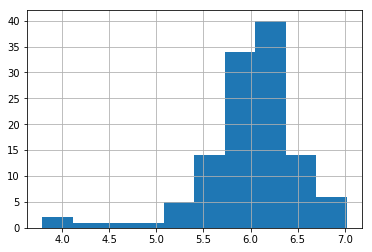

In [27]:
#create a chart of all production companies (with <9 movies) and their average scores
df_prod_comp['vote_average'].hist();

Looking at this chart, most scores fall within approximately 5.75 and 6.3, with some as low as 3.5, and some as high as 7.

In [28]:
#I can confirm the above findings with 

df_prod_comp.describe()

,movie_count,vote_average
count,118.000000,118.000000
mean,41.644068,5.985161
std,70.665158,0.516089
min,10.000000,3.790000
25%,11.000000,5.779238
50%,18.000000,6.065761
75%,34.750000,6.272979
max,460.000000,7.018182


In [29]:
#And to see the lowest performers of the list:

df_prod_comp.tail()

,main_prod_comp,movie_count,vote_average
107,Ghost House Pictures,10,5.060000
92,After Dark Films,11,4.690909
115,Castel Film Romania,10,4.360000
32,The Asylum,31,3.925806
105,"Asylum, The",10,3.790000


I can also see a possible duplicate here, but frankly, even if I combined them it would not help their scores.

### Question 3: What kinds of properties are associated with movies that have a high score ('vote_average')?

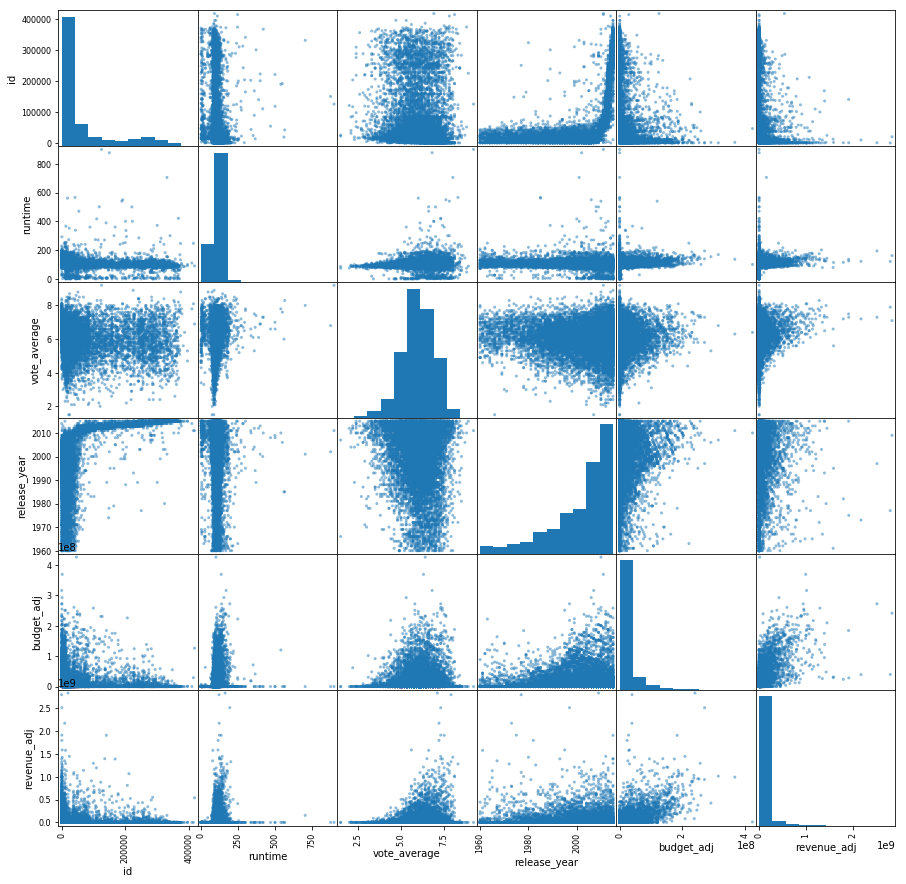

In [30]:
#Just to peek at my data, I'm going to do scatter plots of the numeric data to see if I can
#identify any striking correlations right off the bat.

pd.plotting.scatter_matrix(df, figsize=(15,15));

I don't see any strong correlations there, but I'll dive in to take a deeper look at the relationships between variables.

In [31]:
#To start this analysis, I'm going to split the 'genres' column, and keep only the first value.

df['genre'] = df['genres'].str.split('|', 1, expand=True)[0]

In [32]:
#And now I'll drop the old 'genres' columns

df.drop('genres', axis=1, inplace=True)
df.head()

,id,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj,main_prod_comp,genre
0,135397,Jurassic World,124,6.5,2015,137999939.3,1.392446e+09,Universal Studios,Action
1,76341,Mad Max: Fury Road,120,7.1,2015,137999939.3,3.481613e+08,Village Roadshow Pictures,Action
2,262500,Insurgent,119,6.3,2015,101199955.5,2.716190e+08,Summit Entertainment,Adventure
3,140607,Star Wars: The Force Awakens,136,7.5,2015,183999919.0,1.902723e+09,Lucasfilm,Action
4,168259,Furious 7,137,7.3,2015,174799923.1,1.385749e+09,Universal Pictures,Action


This looks much better, and now I will detemine what "high score" consitutes. I'm thinking I'll use the mean as my tipping point, and anything above average is high, and anything average or below is low. 

I'll look at the above average scored movies, and see how their properties are different from the rest of the movies. I'll be looking at runtime, release year, and genre. 

I analyzed scores by production company in the last question, so I won't rehash that here.

In [33]:
#First, I'll see what the score cutoff is that constitues above average.

df.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looks like the mean of the scoring range is 5.975 and above. To make my queries easier, I'm going to insert a new column in, "score_range", that will have either 'low' or 'high' as a value. Movies with scores above 5.975 will get a 'high' and movies with a score of 5.975 or below will get a 'low.'

In [34]:
#Need to set my bin edges, [min,mean,max], and bin names

bin_edges = [0, 5.974922, 10]
#I tried using zero as the min, but was getting some 'NaN' values, so I'm using -1 instead

bin_names = [0,1]

#Add a new column to the df, using these bins

df['score_range'] = pd.cut(df['vote_average'], bin_edges, labels = bin_names)

In [38]:
#A little check to see if that worked (uncomment cells to see from different angles)
#df.head()
#df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
main_prod_comp    9836 non-null object
genre             10843 non-null object
score_range       10866 non-null category
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 774.8+ KB


Okay, now that I have column all set, I'm think I'm ready to move on to my first comparison.

First, a movie's score versus the runtime: is there a pattern between longer or shorter movies and a better or worse score?

In [39]:
df.groupby('score_range')['runtime'].mean()

score_range
0     97.572983
1    105.985026
Name: runtime, dtype: float64

Just from this quick data pull, it appears that the runtime for highly rated movies is higher than that of lower rated movies. 

Since 'runtime' is an interger (not a float), I'll create a histogram of the runtimes of highly rated movies vs the runtimes of lower rated movies to see if there is in fact a noticable difference.

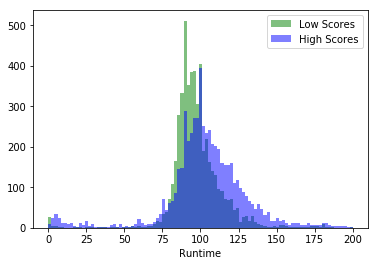

In [40]:
x = df.query('score_range==0')['runtime']
y = df.query('score_range==1')['runtime']

bins = np.linspace(0, 200, 100)

plt.hist(x, bins, alpha=0.5, label='Low Scores', color='g')
plt.hist(y, bins, alpha=0.5, label='High Scores', color='b')
plt.legend(loc='upper right')
plt.xlabel('Runtime')
plt.show()

Looking at this chart, higher scoring movies do definitly run a bit longer (the purple is more right skewed), but higher rated movies also have a wider spread of the runtime distribution. This chart is showing me that, for movies between 75 minutes and 100 minutes (the green peak), there are more likely to be lower rated. But, for movies less than 75 minutes or more than 100 minutes, they are more likely to be higher rated.

Now, onto looking at high and low scoring movies vs release year; are older movies more highly rated?

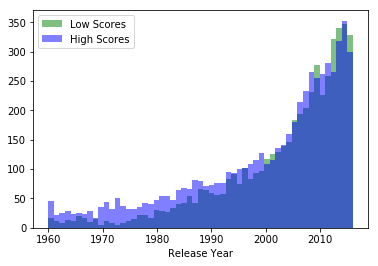

In [41]:
x = df.query('score_range==0')['release_year']
y = df.query('score_range==1')['release_year']

bins = np.linspace(1960, 2016, 56)

plt.hist(x, bins, alpha=0.5, label='Low Scores', color='g')
plt.hist(y, bins, alpha=0.5, label='High Scores', color='b')
plt.legend(loc='upper left')
plt.xlabel('Release Year')
plt.show()

So, this chart shows a couple of things. First, there are more high scoring movies for most years, hence all the blue. And secondly, both the blue and the green graphs have approximately the same shape, therefore I'm not confident in drawing any conclusions about the dependency of these two variables.

Next, I'll take a look at genres vs score.

In [47]:
#Create a new dataframe with 'genre' as the unique key, and counts of low scoring and high 
#scoring movies for each genres as the other columns

df_genre = df.groupby('genre', as_index=False)['score_range'].sum()

df_genre.head()

,genre,score_range
0,Action,707
1,Adventure,339
2,Animation,301
3,Comedy,1116
4,Crime,249


In [49]:
#Let's rename this column to make it more clear. I would like the new name to be 'high_scores'.

df_genre.rename(columns={'score_range': 'high_scores'}, inplace=True)
df_genre.head()

,genre,high_scores
0,Action,707
1,Adventure,339
2,Animation,301
3,Comedy,1116
4,Crime,249


In [50]:
#Create a new column in 'df_year' dataframe, 'movie_count' that counts up all the movies in a
#particlar year

df_genre['movie_count'] = df.groupby('genre', as_index=False)['id'].count()['id']
df_genre.head()

,genre,high_scores,movie_count
0,Action,707,1590
1,Adventure,339,586
2,Animation,301,403
3,Comedy,1116,2319
4,Crime,249,381


In [51]:
#I need to add in one last column, 'high_score_percent', that calculates the percent of
#high scoring movies in each genre (for easier graphing)

df_genre['high_score_percent'] = df_genre['high_scores']/df_genre['movie_count']
df_genre.head()

,genre,high_scores,movie_count,high_score_percent
0,Action,707,1590,0.444654
1,Adventure,339,586,0.578498
2,Animation,301,403,0.746898
3,Comedy,1116,2319,0.481242
4,Crime,249,381,0.653543


In [58]:
#Quickly, I'll sort the data by 'high_score_percent' for my graph in the next step.

df_genre.sort_values(by ='high_score_percent', ascending=False, inplace=True)

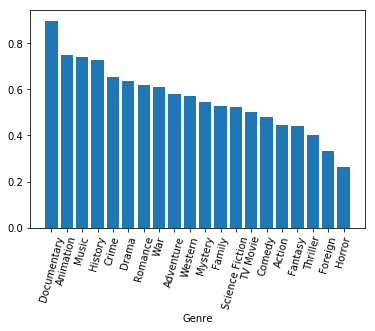

In [59]:
#I'll make a bar chart of each genre's percentage of high scoring movies
    
labels = df_genre['genre']
x = np.arange(len(labels))
y = df_genre['high_score_percent']
plt.bar(x,y)
plt.xlabel('Genre')
plt.xticks(x,labels,rotation=75)
plt.title = ('Percentage of High Scoring Movies within Genre')
plt.show();

Well, this chart is interesting. Documentaries have a much higher proportion of highly rated movies that other genres, and on the opposite end of that spectrum are horror movies, which didn't do so well. 

<a id='conclusions'></a>
## Conclusions

1. Are big budget films becoming more common?
First, let me say that this dataset was flawed, and half of the records of budget were zero (essentially missing), so that whittled my dataset from 10,000 records down to 5,000. So, this was not ideal, but I went ahead with the exploration anyways. 

It appears that big budget movies (defined as the top 25% of budget of this dataset) had been on the rise until 1998, when they peaked. Since 1998, the amount of big budget movies has had a rough ride, but overall, they have been falling.

I looked into the driver of this decrease. Was it because less big budget movies were coming out, or was it that there were lots and lots of non-big budget movies coming out? It seems like the main driver of the decrease in the proportion of big budget movies since 1998 is due mostly to the sheer amount of movies (no matter what the budget) that have come out every year since 1998, which has rapidy expanded.

2. For production companies with at least 10 movies under their belt, are there any companies that stand out from the pack, that make either consistently better or worse movies?

Yes. BBC took the top two spots for highest rated production company. Pixar, a household name, is also very high, ranked at number 4. And Marvel Studios (Iron Man, Spider Man, X-Men, The Avengers, etc) took the 5th highest spot.

The lowest two ranked production companies were The Asylum (spelled two different ways), so even if I were to combine their data, they would still be ranked last.

A quick caveat: it seems as if this particular data field was freeform, and entered by random people, because there was a lot of inconsistancy with the names of the prodcution studios. I chose not to combine those that I assumed with duplicates (but spelled differently) because I didn't want to assume, and couldn't validate it on my own. 

3. What kinds of properties are associated with movies that have high revenues?

I didn't see any variables that had strong correlation, but I did find a few intesting observations. 

In regards to runtime, higher scoring movies did definitly tend to run a bit longer, but higher rated movies also have a wider spread of the runtime distribution. For movies between 75 minutes and 100 minutes, they are more likely to be lower rated. But, for movies less than 75 minutes or more than 100 minutes, they are more likely to be higher rated.

When I looked at the score of the movies in relation to their release year, I saw no correlation.

Lastly, I looked at the different genres and the proportion of low/high scoring movies, and saw a couple interesting trends. Documentaries were scored much better than the other genres (90% were high scoring), whereas Horror movies had the lowest with only 26% with a high score. Animation, Music and History were all very close with 73-75% high scoring. 
Foreign films didn't fare so well; this genre was second to last with only 33% of them scoring high. 

A limitation to this analysis: I only looked at the first entry for 'production_companies' and 'genres' even though both columns had several pieces of data contained within them. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])